#**Project Name: Fake News Detection and Evaluation with Confusion Matrix**


# **Problem Statement:**


This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset cab also be downloaded from kaggle using the link: www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

# **Import Packages**

Imported all required libraries and installed any missing packages in Google Colab.

In [1]:
# installed missing package gensim
!pip install gensim

In [2]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Preprocessing**

In [3]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/drive/My Drive/IDEAS-TIH/Internship_2025/fake.csv')
true_news_data = pd.read_csv('/content/drive/My Drive/IDEAS-TIH/Internship_2025/true.csv')

**Q1.** View the imported csv file data using Pandas Dataframe.

In [4]:
import pandas as pd

# View first 5 rows of each dataset
print("Fake News Dataset:")
print(fake_news_data.head(), "\n")

print("True News Dataset:")
print(true_news_data.head(), "\n")

# Check info (columns, datatypes, missing values)
print("Fake News Info:")
print(fake_news_data.info(), "\n")

print("True News Info:")
print(true_news_data.info(), "\n")

# Summary statistics
print("Fake News Summary:")
print(fake_news_data.describe(include='all'), "\n")

print("True News Summary:")
print(true_news_data.describe(include='all'), "\n")

Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017   

True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans f

In [5]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [6]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2.** drop rows from the dataset consisting null values.

In [7]:
# Drop rows with null values in fake news dataset
fake_news_data_clean = fake_news_data.dropna()

# Drop rows with null values in true news dataset
true_news_data_clean = true_news_data.dropna()

# Verify if nulls are removed
print("Null values in Fake News dataset:", fake_news_data_clean.isnull().sum().sum())
print("Null values in True News dataset:", true_news_data_clean.isnull().sum().sum())


Null values in Fake News dataset: 0
Null values in True News dataset: 0


**Q3.** shuffle the data.

In [8]:
# Shuffle fake news dataset
fake_news_data_shuffled = fake_news_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Shuffle true news dataset
true_news_data_shuffled = true_news_data.sample(frac=1, random_state=42).reset_index(drop=True)

# View first 5 rows after shuffling
print("Shuffled Fake News Data:")
print(fake_news_data_shuffled.head(), "\n")

print("Shuffled True News Data:")
print(true_news_data_shuffled.head())

Shuffled Fake News Data:
                                               title  \
0  ABOUT HILLARY’S COUGH: We Discovered The Secre...   
1  BREAKING: OBAMACARE REPEAL Clears First Hurdle...   
2  ‘SLEEPY’ JUSTICE GINSBURG: Excites Crowd By Sa...   
3   WATCH: Kellyanne Conway Very Upset Hillary Cl...   
4   GOP Gives Trump The Middle Finger, Prepares T...   

                                                text    subject  \
0                                                      politics   
1  The Senate voted 51-48 this afternoon to proce...   politics   
2  So much for the SCOTUS not being political Che...  left-news   
3  White House counselor Kellyanne Conway crawled...       News   
4  Donald Trump may have decided that Russia is g...       News   

               date  class  
0      Jul 20, 2016      1  
1       Jan 4, 2017      1  
2       Feb 7, 2017      1  
3   August 24, 2017      1  
4  December 9, 2016      1   

Shuffled True News Data:
                                  

In [9]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

In [10]:
# view top 10 rows of processed dataset
df.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


**Q4.** view the text content of a random data point.

In [11]:
# View one random row from fake news dataset
random_fake = fake_news_data.sample(1)
print("Random Fake News Article:")
print(random_fake['text'].values[0])  # assuming the text column is named 'text'

# View one random row from true news dataset
random_true = true_news_data.sample(1)
print("\nRandom True News Article:")
print(random_true['text'].values[0])


Random Fake News Article:
This video of conservative comedian Steven Crowder should be an example for every conservative in America on how to handle the well-trained Left!  It should be used in training sessions for conservatives about how to fight back against the LOUD, OBNOXIOUS liberals who have been allowed to shame and disgrace conservatives into adopting their positions for way too long! If you re tired of sitting back and allowing the Left to disrupt every conservative event or rally in America by shaming you or threatening your physical well-being, you are going love this video! Comedian Steven Crowder mercilessly tore into so-called  social justice warriors  when they disrupted his opening remarks within seconds of him taking the stage.Here is the video showing the LOUD and OBNOXIOUS protesters who Steven Crowder was addressing:Crowder was scheduled to  tell some jokes  and discuss free speech at the University of Massachusetts on Monday night alongside other speakers, includi

**Data Visualization**

Text(0, 0.5, 'Number of News')

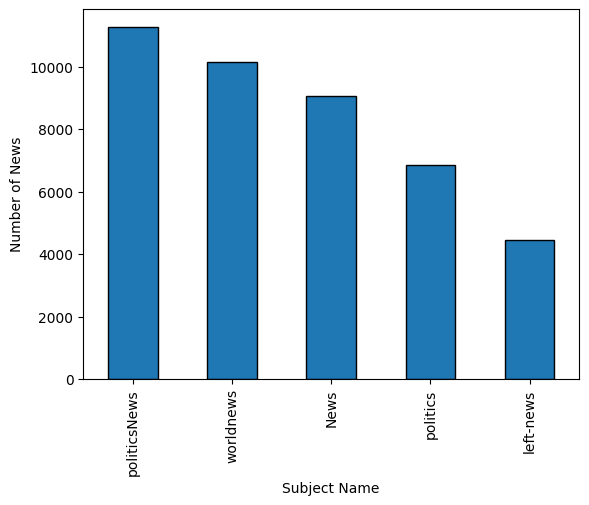

In [12]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5.** Create a pie chart to find the pecentage of news on differenet subject.

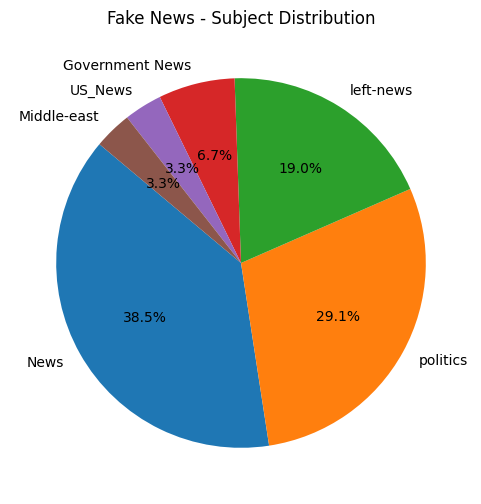

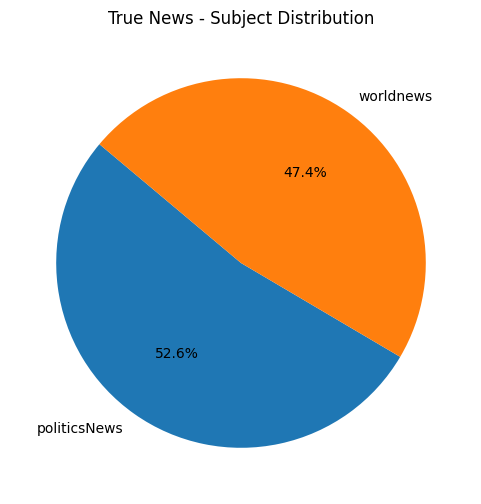

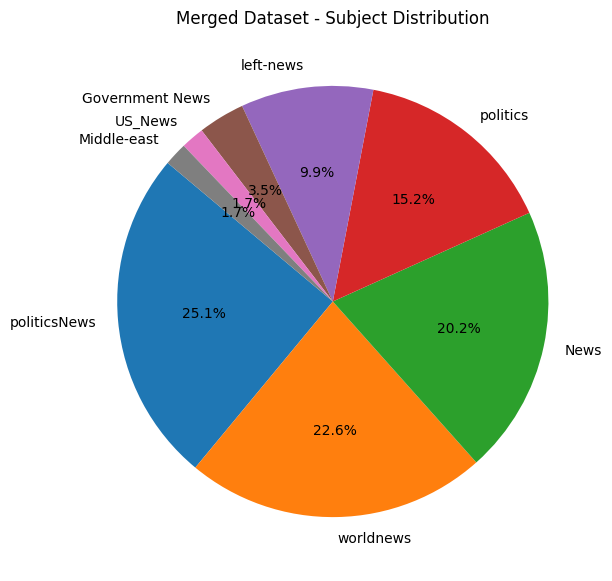

In [13]:
import matplotlib.pyplot as plt

# Count subjects in fake news dataset
fake_subject_counts = fake_news_data['subject'].value_counts()

# Count subjects in true news dataset
true_subject_counts = true_news_data['subject'].value_counts()

# Plot pie chart for fake news
plt.figure(figsize=(6,6))
plt.pie(fake_subject_counts, labels=fake_subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Fake News - Subject Distribution")
plt.show()

# Plot pie chart for true news
plt.figure(figsize=(6,6))
plt.pie(true_subject_counts, labels=true_subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("True News - Subject Distribution")
plt.show()

# Count subjects in merged dataset
merged_subject_counts = df['subject'].value_counts()

# Plot pie chart for merged dataset
plt.figure(figsize=(7,7))
plt.pie(merged_subject_counts, labels=merged_subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Merged Dataset - Subject Distribution")
plt.show()


**Text Processing**

In [14]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [15]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [16]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'former vice president joe biden was asked on monday by matt lauer on nbc s today to name something specific that donald trump has been doing well well that seems like a trick question since trump has passed no major legislation and reaches across the aisle only to take shots at democrats in his twitter timeline during his morning rage tweets so biden struggled to find something anything that trump has done well since taking office i think there s a number of things he s doing well but even the things he s doing well it s how he does them biden said it s more the tone of this administration that bothers me he continued with all due respect you haven t come up with one thing you think he s doing well lauer said well i think he married very well biden joked although biden didn t mention which of trump s three marriages he s speaking of trump s first marriage to ivana ended after he had an affair with marla maples trump went on to marry maples then they divorced trump is currently married

# **Building Model**

In [17]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']

**Q6.** Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Add labels (0 = Fake, 1 = True)
fake_news_data['label'] = 0
true_news_data['label'] = 1

# Combine datasets
news_data = pd.concat([fake_news_data, true_news_data], axis=0)

# Features (X) and target (y)
X = news_data['text']   # using the text column as feature
y = news_data['label']  # labels (0 or 1)

# Split into train and test sets (25% test size)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Check the sizes
print("Training set size:", x_train.shape[0])
print("Testing set size:", x_test.shape[0])


Training set size: 33673
Testing set size: 11225


## **Word Embedding ( Word2Vec )**

In [19]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [20]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [21]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [22]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

##**Logistic Regression**

In [23]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [26]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [1 0 1 ... 1 0 1]
Accuracy Score on Test Data:  0.9412026726057906


####**Accuracy Checking**

In [27]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9412026726057906
Precision: 0.9309585016525891
Recall: 0.9469555472543892
F1 score: 0.9388888888888889


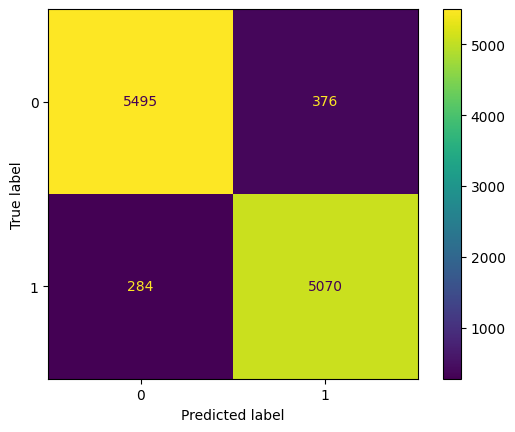

In [28]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

##**Random Forest Classifier**

####**Model Building and Prediction**

**Q7.** Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

In [31]:
# Initialize and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train_w2v, y_train)

# Predict outcomes on test data
y_pred = rf_clf.predict(x_test_w2v)

# Show first 20 predictions vs actual labels
results = pd.DataFrame({
    "Actual": y_test[:20].values,
    "Predicted": y_pred[:20]
})
print(results)

    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        0          0
5        1          1
6        1          0
7        1          1
8        0          0
9        0          0
10       1          1
11       0          0
12       0          1
13       1          1
14       1          1
15       1          1
16       0          0
17       1          1
18       1          1
19       1          1


####**Accuracy Checking**

**Q8.** Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.

Accuracy: 0.9684632516703786
Precision: 0.9679895170348184
Recall: 0.9658199477026522
F1 Score: 0.9669035153328347


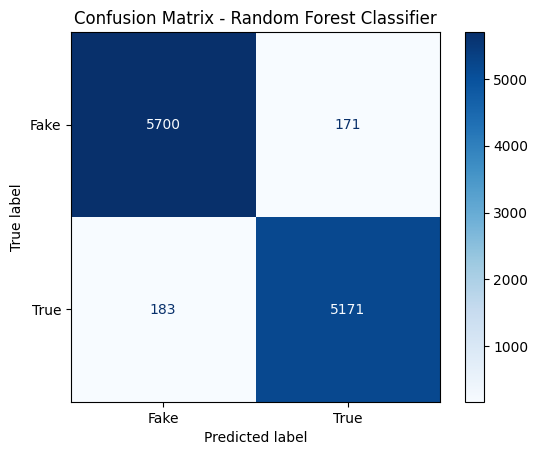

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Accuracy, Precision, Recall, F1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "True"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


#**Save the Model using pickle**

In [34]:
# save the logistic regression model as pickle file
import pickle
filename1 = '/content/drive/My Drive/IDEAS-TIH/Internship_2025/word2vec_logistic_model.pickle'
pickle.dump(logistic_model, open(filename1, 'wb')) #word2vec model

In [35]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9412026726057906


**Q9.** Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.

In [36]:
import os
import pickle

# Path where you want to save the models
folder_path = '/content/drive/My Drive/IDEAS-TIH/Internship_2025'
filename_rf = os.path.join(folder_path, 'random_forest_w2v_model.pickle')
filename_w2v = os.path.join(folder_path, 'word2vec_model_pickle.pickle')

# Create folder if it does not exist
os.makedirs(folder_path, exist_ok=True)

# Save the Random Forest model with pickle
with open(filename_rf, 'wb') as file:
    pickle.dump(rf_clf, file)

# Save the Word2Vec model with pickle
with open(filename_w2v, 'wb') as file:
    pickle.dump(w2v_model, file)

print("✅ Random Forest (Word2Vec) model saved at:", filename_rf)
print("✅ Word2Vec (pickle) model saved at:", filename_w2v)


✅ Random Forest (Word2Vec) model saved at: /content/drive/My Drive/IDEAS-TIH/Internship_2025/random_forest_w2v_model.pickle
✅ Word2Vec (pickle) model saved at: /content/drive/My Drive/IDEAS-TIH/Internship_2025/word2vec_model_pickle.pickle


**Q10.** Load that saved model in another Notebook use it on other dataset for fake news detection.

**Q11(Optional).**


1.  Try to enhance the model's accuracy by using adaboost or any other boosting methods.
2.  Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.




